Длинна кривой: 
13.903767954618381 +- 1.2271340468189017e-07


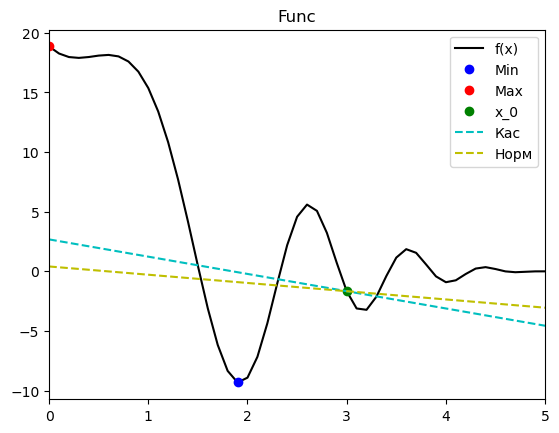

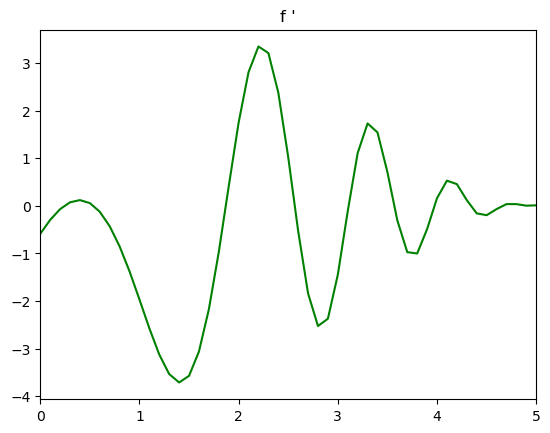

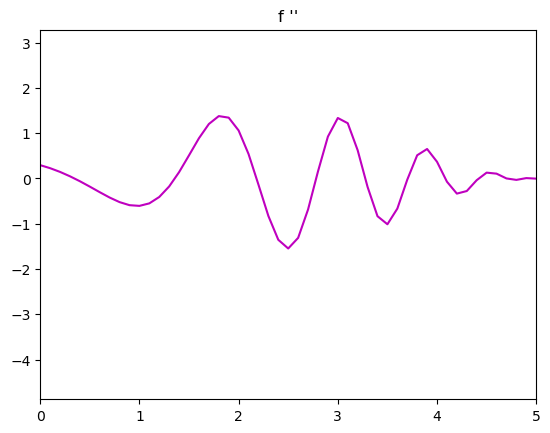

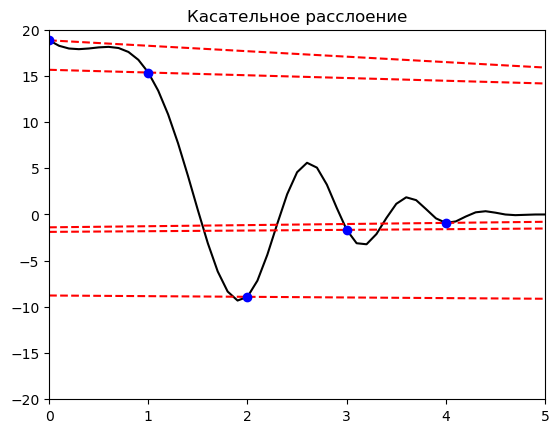

In [21]:
# f(x) = (x - 5)**2 * cos(x**2 - 7) [0,5]
    
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
    
def main():    
    x = np.arange(0, 7, 0.1)
    y = (x - 5)**2 * np.cos(x**2 -7)
    
    minY = np.argmin(y)
    minX = x[minY]
    minY = y[minY]
    
    maxY = np.argmax(y)
    maxX = x[maxY]
    maxY = y[maxY]
    
    x_0 = 3
    y_0 = (x_0 - 5)**2 * np.cos(x_0**2 -7)
    y_k = (x_0 - 5)**2 * np.cos(x_0**2 -7) + np.diff(y[x_0*10:x_0*10+2]) * (x - x_0)
    y_n = (x_0 - 5)**2 * np.cos(x_0**2 -7) + (1 / np.diff(y[x_0*10:x_0*10+2]) )* (x - x_0)
    
    
    dy = np.diff(y)
    ddy = np.diff(dy)
    
    plt.plot(x, y, c="black")
    
    
    
    plt.plot(minX, minY, "ob")
    plt.plot(maxX, maxY, "or")
    
    plt.plot(x_0, y_0, "og")
    plt.plot(x, y_k, "c--")
    plt.plot(x, y_n, "y--")
    
    plt.legend(["f(x)", "Min", "Max", "x_0", "Кас", "Норм"])
    plt.xlim(0,5)
    plt.title("Func")
    
    plt.figure().add_subplot()
    plt.xlim(0,5)
    plt.title("f '")
    plt.plot(x[:-1], dy, "g")
    
    plt.figure().add_subplot()
    plt.xlim(0,5)
    plt.title("f ''")
    plt.plot(x[:-2], ddy, "m")
    
    plt.figure().add_subplot()
    plt.plot(x, y, c="black")
    
    for i in range(0, len(x)-22, 10): # строю касательное расслоение, то есть к каждой точке кривой строю касательную
        x_0 = i/10
        y = (x - 5)**2 * np.cos(x**2 -7)
        y_k = (x_0 - 5)**2 * np.cos(x_0**2 -7) + np.diff(y[int(x_0):(int(x_0) + 2)]) * (x - x_0)
        y = (x_0 - 5)**2 * np.cos(x_0**2 -7)
        plt.plot(x, y_k, "--r") # получилось не очень... но вроде так и должно быть
        plt.plot(x_0, y, "ob")
    
    arc = lambda dy: (1 + (dy)**2)**(1/2)
    length = integrate.quad(arc, a=0, b=5)
    print("Длинна кривой: ")
    print(str(length[0]) + " +- "+ str(length[1]))
    
    plt.xlim(0,5)
    plt.ylim(-20,20)
    plt.title("Касательное расслоение")
    
    
    
    plt.show()

if __name__ == "__main__":
    main()